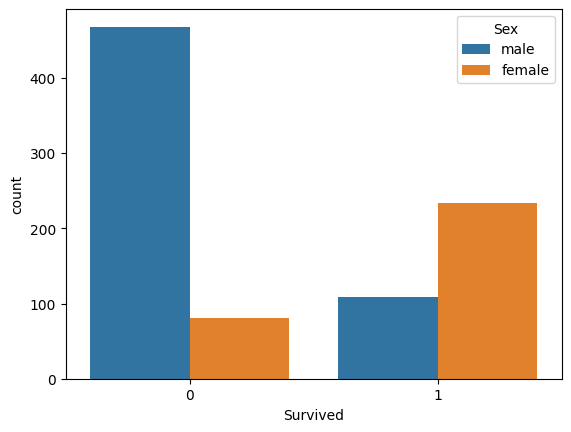

Model Accuracy: 0.8100558659217877

Feature Importance:
 Sex            0.426339
Fare           0.156414
Pclass         0.140546
Age            0.098084
PassengerId    0.072444
SibSp          0.040479
Parch          0.034366
Embarked       0.031329
dtype: float64


In [40]:

import pandas as df
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


#upload the dataset into the code
titanic_dataset = df.read_csv('titanic (1).csv')

#visualize data
sns.countplot(x='Survived', hue='Sex', data=titanic_dataset)
plt.show()

#drop the columns that are not required
titanic_dataset = titanic_dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#fill those missing values
titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean())
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0])

#convert categorial variables into numeric
label = LabelEncoder()
titanic_dataset['Sex'] = label.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked'] = label.fit_transform(titanic_dataset['Embarked'])

#split data into training and testing set
predictors = titanic_dataset.drop('Survived', axis=1)
outcome = titanic_dataset['Survived']
predictors_train, predictors_test, outcome_train, outcome_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

#build the random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(predictors_train, outcome_train)

#predict the model and evaluate it
predictions = model.predict(predictors_test)
print('Model Accuracy:', accuracy_score(outcome_test, predictions))

#feature importance
feature_importance = df.Series(model.feature_importances_, index=predictors.columns)
print('\nFeature Importance:\n', feature_importance.sort_values(ascending=False))


In [29]:
print(titanic_dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
